<a href="https://colab.research.google.com/github/azurast/CreditScoreClassification/blob/master/Credit_Score_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Imports

## Libraries

In [46]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
# Read csv to Colab
train_url = 'https://raw.githubusercontent.com/azurast/CreditScoreClassification/master/train.csv'
test_url = 'https://raw.githubusercontent.com/azurast/CreditScoreClassification/master/test.csv'

# Set data frame
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1. Get to Know & Understand the Data

## Data description, shape & size

In [3]:
# disable column truncation because we want to see all the available columns 
pd.set_option('display.max_columns', None)

In [4]:
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [5]:
display(train_df.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
# quick look at the train data frame
print('\033[91m Train Data Frame')
display(train_df.head())
print('Rows x Cols :', train_df.shape)

 Train Data Frame


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Rows x Cols : (100000, 28)


In [7]:
# quick look at the test data frame
print('\033[91m Test Data Frame')
display(test_df.head())
print('Rows x Cols :', test_df.shape)

 Test Data Frame


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


Rows x Cols : (50000, 27)


## Data information and types

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

# 👀 Checkpoint 1 - Findings

After analysing we can categorize the data into numerical and categorical data.

The data that belong to **numerical types** are:
1. Num_Bank_Accounts
2. Num_Credit_Card
3. Interest_Rate
4. Delay_from_due_date
5. Num_Credit_Inquiries
6. Credit_Utilization_Ratio
7. Total_EMI_per_month
8. Age
9. Annual_Income
10. Num_of_Loan
11. Num_of_Delayed_Payment
12. Changed_Credit_Limit
13. Outstanding_Debt
14. Amount_invested_monthly
15. Monthly_Balance
16. Monthly_Inhand_Salary

And the data that belong to **categorical types** are:
1. Occupation
2. TypeofLoan
3. CreditMix
4. CreditHistoryAge
5. PaymentofMinAmount
6. PaymentBehaviour
7. CreditScore

The rest are irrelevant to our problem and are just simple identifiers for each

# 2. Cleanup the Data

## Define & divide categories of data

Define numerical and categorical data

In [10]:
numerical_data = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_History_Age']

categorical_data = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score']

Drop irrelevant data

In [11]:
irrelavent_data = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN']
train_df.drop(columns=irrelavent_data, inplace=True, axis=1)
test_df.drop(columns=irrelavent_data, inplace=True, axis=1)

## Check for missing values

In [12]:
train_missing_values = train_df.isnull().sum().sort_values(ascending=False)
print('\033[91m Train Data Missing Values')
train_missing_values

 Train Data Missing Values


Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
Age                             0
Outstanding_Debt                0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Changed_Credit_Limit            0
Credit_Mix                      0
Occupation                      0
Delay_from_due_date             0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Credit_Score                    0
dtype: int64

In [13]:
test_missing_values = test_df.isnull().sum().sort_values(ascending=False)
print('\033[91m Test Data Missing Values')
test_missing_values

 Test Data Missing Values


Monthly_Inhand_Salary       7498
Type_of_Loan                5704
Credit_History_Age          4470
Num_of_Delayed_Payment      3498
Amount_invested_monthly     2271
Num_Credit_Inquiries        1035
Monthly_Balance              562
Credit_Mix                     0
Payment_Behaviour              0
Total_EMI_per_month            0
Payment_of_Min_Amount          0
Credit_Utilization_Ratio       0
Outstanding_Debt               0
Age                            0
Occupation                     0
Delay_from_due_date            0
Num_of_Loan                    0
Interest_Rate                  0
Num_Credit_Card                0
Num_Bank_Accounts              0
Annual_Income                  0
Changed_Credit_Limit           0
dtype: int64

From this we know that there are 7 columns that has missing values that we need to resolve.

## Check for duplicates in data

In [14]:
print('\033[91m Train Data Duplicates')
train_duplicates = train_df.duplicated().sum()
print('\033[0m', train_duplicates)

 Train Data Duplicates
 0


In [15]:
print('\033[91m Test Data Duplicates')
test_duplicates = test_df.duplicated().sum()
print('\033[0m', test_duplicates)

 Test Data Duplicates
 0


## Convert incorrectly identified categorical data to numerical data

We notice that some data that are supposed to be numerical are identified as categorical. We need to do some cleanup to convert them into numerical.

First, let's check their values

In [34]:
incorrect_categorical_data_labels = ['Age',
                     'Annual_Income',
                     'Num_of_Loan',
                     'Num_of_Delayed_Payment',
                     'Changed_Credit_Limit',
                     'Outstanding_Debt',
                     'Amount_invested_monthly',
                     'Monthly_Balance'] 
for label in incorrect_categorical_data_labels:
  unique_values = train_df[label].unique()
  print(label + ' unique values :', unique_values)
  print('----\n')

Age unique values : [  23.  500.   28. ... 4808. 2263. 1342.]
----

Annual_Income unique values : [ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]
----

Num_of_Loan unique values : [4.000e+00 1.000e+00 3.000e+00 9.670e+02 1.000e+02 0.000e+00 2.000e+00
 7.000e+00 5.000e+00 6.000e+00 8.000e+00 9.000e+00 1.464e+03 6.220e+02
 3.520e+02 4.720e+02 1.017e+03 9.450e+02 1.460e+02 5.630e+02 3.410e+02
 4.440e+02 7.200e+02 1.485e+03 4.900e+01 7.370e+02 1.106e+03 4.660e+02
 7.280e+02 3.130e+02 8.430e+02 5.970e+02 6.170e+02 1.190e+02 6.630e+02
 6.400e+02 9.200e+01 1.019e+03 5.010e+02 1.302e+03 3.900e+01 7.160e+02
 8.480e+02 9.310e+02 1.214e+03 1.860e+02 4.240e+02 1.001e+03 1.110e+03
 1.152e+03 4.570e+02 1.433e+03 1.187e+03 5.200e+01 1.480e+03 1.047e+03
 1.035e+03 1.347e+03 3.300e+01 1.930e+02 6.990e+02 3.290e+02 1.451e+03
 4.840e+02 1.320e+02 6.490e+02 9.950e+02 5.450e+02 6.840e+02 1.135e+03
 1.094e+03 1.204e+03 6.540e+02 5.800e+01 3.480e+02 6.140e+02 1.363e+03
 3.230e+02 1.406e+03 

* Replace special characters in numerical data
* Replace empty values with nan
* Configure the type to be float

In [17]:
for label in incorrect_categorical_data_labels:
  train_df[label] = train_df[label].str.strip('-_')
  test_df[label] = test_df[label].str.strip('-_')
  train_df[label] = train_df[label].replace({'':np.nan})
  test_df[label] = test_df[label].replace({'':np.nan})
  train_df[label] = train_df[label].astype('float64')
  test_df[label] = test_df[label].astype('float64')

## Transform `Credit_History_Age` to years only

The column `Credit_History_Age` data is formatted like "23 years and 5 month" and we will only use the years value for it to be numerical.


In [43]:
def get_years(x):
  if x is not None:
    return str(x).strip()[0:2]

train_df.Credit_History_Age = train_df.Credit_History_Age.apply(get_years)

Ensure now the data are all numerical

In [18]:
for label in incorrect_categorical_data_labels:
  print('Train Data ' + label + ' type is ', train_df[label].dtype)
  print('Test Data ' + label + ' type is ', test_df[label].dtype)
  print('\n')

Train Data Age type is  float64
Test Data Age type is  float64


Train Data Annual_Income type is  float64
Test Data Annual_Income type is  float64


Train Data Num_of_Loan type is  float64
Test Data Num_of_Loan type is  float64


Train Data Num_of_Delayed_Payment type is  float64
Test Data Num_of_Delayed_Payment type is  float64


Train Data Changed_Credit_Limit type is  float64
Test Data Changed_Credit_Limit type is  float64


Train Data Outstanding_Debt type is  float64
Test Data Outstanding_Debt type is  float64


Train Data Amount_invested_monthly type is  float64
Test Data Amount_invested_monthly type is  float64


Train Data Monthly_Balance type is  float64
Test Data Monthly_Balance type is  float64




## Replace missing values with mean

In [39]:
labels_with_missing_values = ['Monthly_Inhand_Salary',
                              'Type_of_Loan',
                              'Credit_History_Age',
                              'Num_of_Delayed_Payment',
                              'Amount_invested_monthly',
                              'Monthly_Balance',
                              'Changed_Credit_Limit',
                              'Num_Credit_Inquiries']

train_means = train_df[labels_with_missing_values].mean()      
test_means = test_df[labels_with_missing_values].mean()

print('\033[91mTrain means\n \033[0m', train_means)
print('\033[91mTest means\n \033[0m', test_means)

for idx in range(len(labels_with_missing_values)):
  train_df[labels_with_missing_values[idx]] = train_means.values[idx]

for idx in range(len(labels_with_missing_values)):
  test_df[labels_with_missing_values[idx]] = test_means.values[idx]

Train means
  Monthly_Inhand_Salary      4.194171e+03
Type_of_Loan               3.094627e+01
Credit_History_Age         6.374130e+02
Num_of_Delayed_Payment     3.088580e+22
Amount_invested_monthly    1.046568e+01
Monthly_Balance            2.775425e+01
Changed_Credit_Limit       1.046568e+01
Num_Credit_Inquiries       2.775425e+01
dtype: float64
Test means
  Monthly_Inhand_Salary      4.182004e+03
Type_of_Loan               3.091037e+01
Credit_History_Age         6.416548e+02
Num_of_Delayed_Payment     4.045471e+22
Amount_invested_monthly    1.045805e+01
Monthly_Balance            3.008020e+01
Changed_Credit_Limit       1.045805e+01
Num_Credit_Inquiries       3.008020e+01
dtype: float64


Check if missing values have been solved

In [22]:
train_missing_values = train_df.isnull().sum().sort_values(ascending=False)
print('\033[91m Recheck Train Data Missing Values')
train_missing_values

 Recheck Train Data Missing Values


Age                         0
Num_Credit_Inquiries        0
Monthly_Balance             0
Payment_Behaviour           0
Amount_invested_monthly     0
Total_EMI_per_month         0
Payment_of_Min_Amount       0
Credit_History_Age          0
Credit_Utilization_Ratio    0
Outstanding_Debt            0
Credit_Mix                  0
Changed_Credit_Limit        0
Occupation                  0
Num_of_Delayed_Payment      0
Delay_from_due_date         0
Type_of_Loan                0
Num_of_Loan                 0
Interest_Rate               0
Num_Credit_Card             0
Num_Bank_Accounts           0
Monthly_Inhand_Salary       0
Annual_Income               0
Credit_Score                0
dtype: int64

In [23]:
test_missing_values = test_df.isnull().sum().sort_values(ascending=False)
print('\033[91m Recheck Test Data Missing Values')
test_missing_values

 Recheck Test Data Missing Values


Age                         0
Occupation                  0
Payment_Behaviour           0
Amount_invested_monthly     0
Total_EMI_per_month         0
Payment_of_Min_Amount       0
Credit_History_Age          0
Credit_Utilization_Ratio    0
Outstanding_Debt            0
Credit_Mix                  0
Num_Credit_Inquiries        0
Changed_Credit_Limit        0
Num_of_Delayed_Payment      0
Delay_from_due_date         0
Type_of_Loan                0
Num_of_Loan                 0
Interest_Rate               0
Num_Credit_Card             0
Num_Bank_Accounts           0
Monthly_Inhand_Salary       0
Annual_Income               0
Monthly_Balance             0
dtype: int64

## ⚠️ TODO Handle outliers

## ⚠️ TODO Encode categorical data

# ⚠️ Finding Relationship

## ⚠️ TODO Correlation
Ini harusnya nanti kelihatan kalau sudah di encode categorical datanya

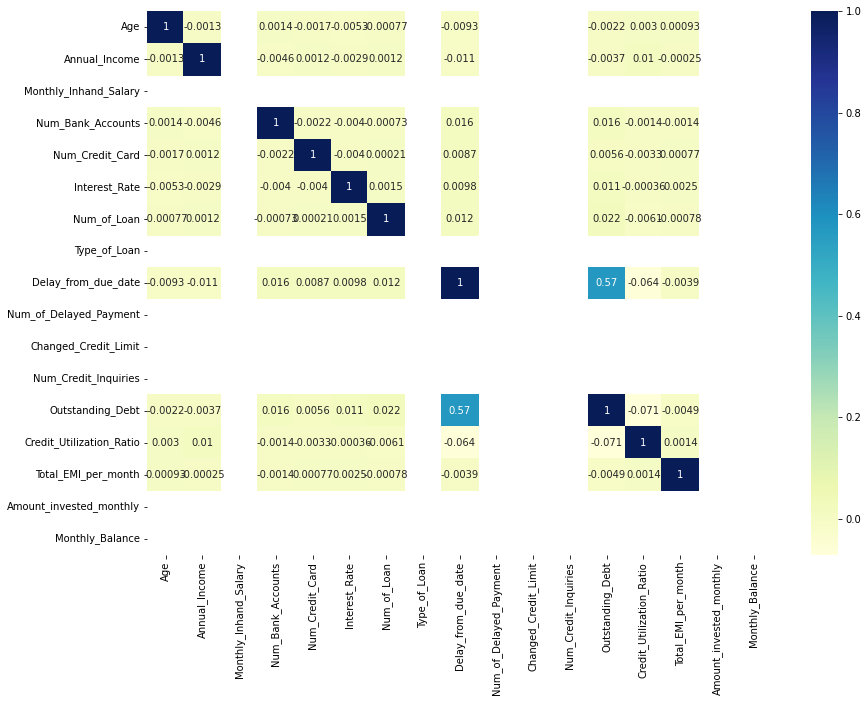

In [53]:
plt.figure(figsize = (14, 10))
sns.heatmap(train_df.corr(), annot = True, cmap = "YlGnBu")

## ⚠️ TODO Feature Selection

# ⚠️ TODO Data Modelling

## ⚠️ TODO Regression